In [1]:
import pandas as pd

from plotnine import *
from plotnine.data import *

%matplotlib inline

### Facet grid

`facet_grid()` is used to form a grid of plots, where the rows and columns of the grid are set by the faceting variables. It is useful for visualising two discrete variables.

In [2]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Basic scatter plot:

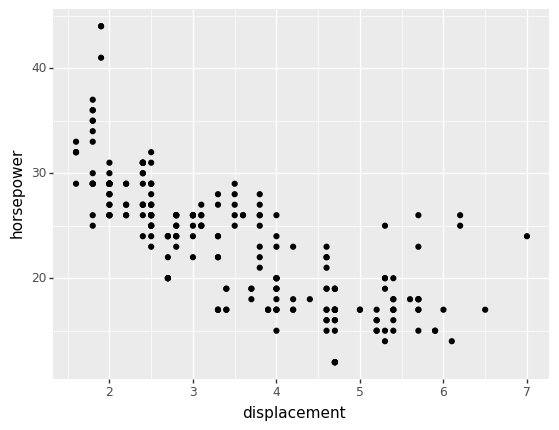

<ggplot: (97654321012345679)>

In [3]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + labs(x='displacement', y='horsepower')
)

Facet a discrete variable into rows:

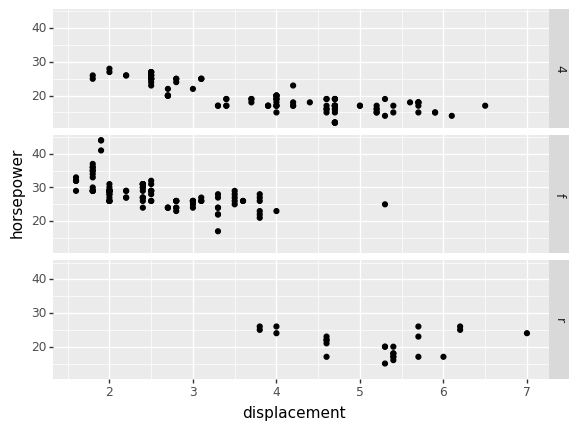

<ggplot: (97654321012345679)>

In [4]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .')
    + labs(x='displacement', y='horsepower')
)

Facet a discrete variable into columns:

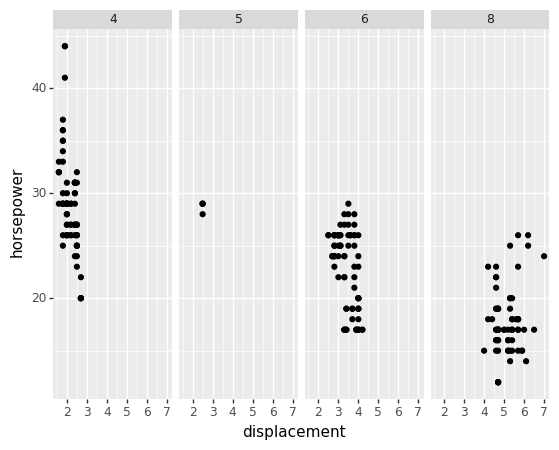

<ggplot: (97654321012345679)>

In [5]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('. ~ cyl')
    + labs(x='displacement', y='horsepower')
)

Facet two discrete variables into rows and columns:

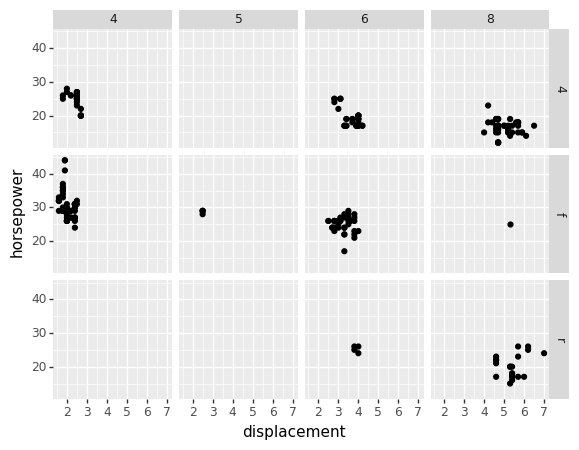

<ggplot: (97654321012345679)>

In [6]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ cyl')
    + labs(x='displacement', y='horsepower')
)

To change the plot order of the rows or columns in the facet grid, reorder the levels of the faceting variable in the data.

In [7]:
# re-order categories
mpg['drv'] = mpg['drv'].cat.reorder_categories(['f', 'r','4'])

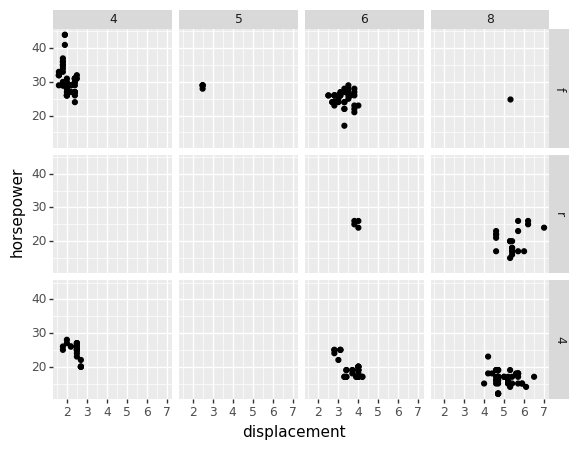

<ggplot: (97654321012345679)>

In [8]:
# facet plot with reorded drv category
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ cyl')
    + labs(x='displacement', y='horsepower')
)

You can choose if the scale of x- and y-axes are fixed or variable by using the `scales` argument within the `facet_grid()` command:

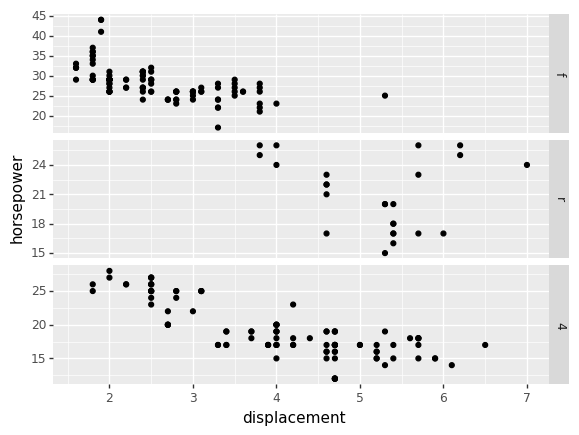

<ggplot: (97654321012345679)>

In [9]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .', scales = 'free')
    + labs(x='displacement', y='horsepower')
)

You can add additional information to your facet labels, by using the `labeller` argument within the `facet_grid()` command. Below we use `labeller = 'label_both'` to include the column name in the facet label.

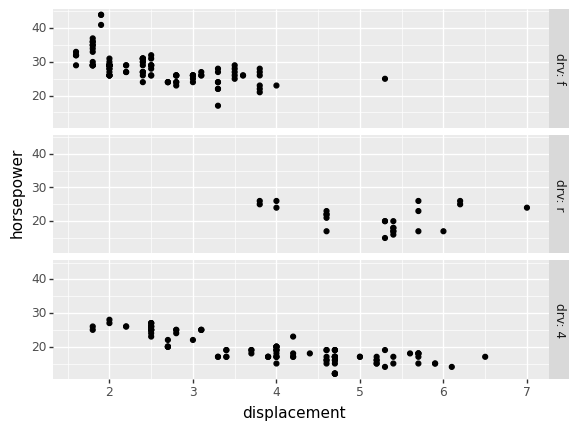

<ggplot: (97654321012345679)>

In [10]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .', labeller = 'label_both')
    + labs(x='displacement', y='horsepower')
)

You can add two discrete variables to a facet:

In [11]:
# add additional column for plotting exercise
mpg["transmission"] = mpg['trans'].map(lambda x: "auto" if "auto" in x else "man" if "man" in x else "")

In [12]:
# inspect new column transmission which identifies cars as having an automatic or manual transmission
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,man
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,man
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


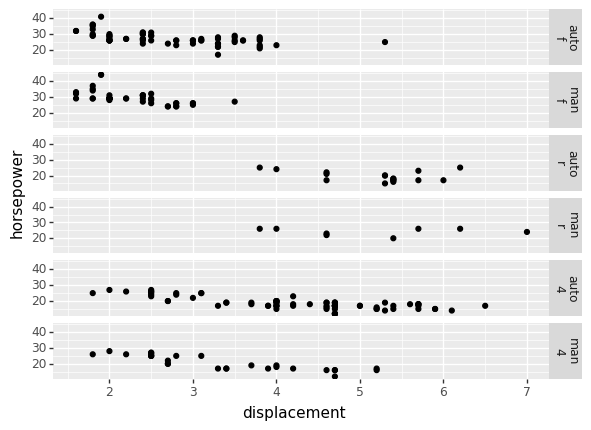

<ggplot: (97654321012345679)>

In [13]:
# facet plot with two variables on one facet
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv + transmission ~ .') # use + to add additional faceting variables
    + labs(x='displacement', y='horsepower')
)

Facet labels can be rotated to make them easier to read using `strip_text_y = element_text(angle = 0)` for row labels within the `theme()` command (use `strip_text_x = element_text(angle = 0)` for column labels). 

If the labels do not fit in the strip, adjust the width of the strip using `strip_background_y` for rows (use `strip_background_x` for columns). You may also need to adjust the text position so it fits in the strip: adjust the horizontal text position in the strip by specifying `ha` in `element_text()`(specify `va` in `element_text()` to adjust the vertical text position).

You can also change the colour of the strip by specifying `color` in `element_text()` .

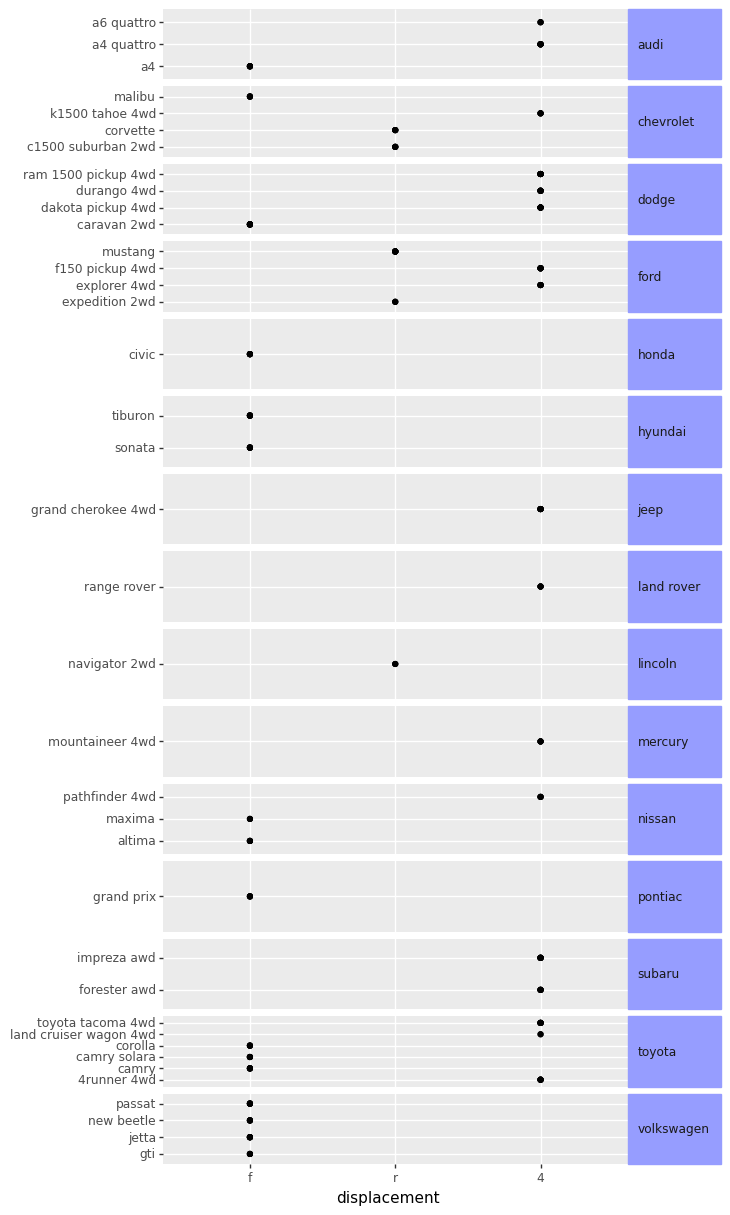

<ggplot: (97654321012345679)>

In [14]:
(
    ggplot(mpg, aes(x='drv', y='model'))
    + geom_point()
    + facet_grid('manufacturer ~ .', scales = 'free')
    + theme(strip_text_y = element_text(angle = 0,              # change facet text angle
                                        ha = 'left'             # change text alignment
                                       ),
            strip_background_y = element_text(color = '#969dff' # change background colour of facet background
                                              , width = 0.2     # adjust width of facet background to fit facet text
                                             ),
            figure_size=(6, 15)                                 # adjust width & height of figure to fit y-axis
           )
    + labs(x='displacement', y='')
)